In [16]:
import random
import pandas as pd

In [17]:
przedmioty = [(50, 5), (94, 76), (31, 88), (71, 84), (91, 15), (19, 47), (12, 44), (1, 49), (10, 7), (16, 19), (3, 78), (57, 69), (27, 14), (99, 40), (52, 58), (93, 79), (50, 48), (39, 20), (26, 39), (40, 14)]
przedmioty = pd.DataFrame(przedmioty, columns=['waga', 'wartosc'])
przedmioty.index.name = "przedmioty"

In [18]:
przedmioty.T

przedmioty,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
waga,50,94,31,71,91,19,12,1,10,16,3,57,27,99,52,93,50,39,26,40
wartosc,5,76,88,84,15,47,44,49,7,19,78,69,14,40,58,79,48,20,39,14


In [19]:
limitCalkowitejWagi = 200

In [20]:
genom = [random.randint(0, 5) == 0 for _ in range(len(przedmioty))]
genom

20 [False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, True, False, False]


In [21]:
def stworzPopulacje(wielkoscPopulacji: int):
    return [[random.randint(0, 5) == 0  for _ in range(len(przedmioty))] for _ in range(wielkoscPopulacji)]

In [22]:
def dopasowanie(geny: list):
    calkowitaWaga = 0
    calkowitaWartosc = 0
    for idx, gen in enumerate(geny):
        if gen:
            calkowitaWaga += przedmioty["waga"][idx]
            calkowitaWartosc += przedmioty["wartosc"][idx]

    if calkowitaWaga > limitCalkowitejWagi:
        return 0
    else:
        return calkowitaWartosc


In [23]:
def wybierzZwyciezcow(populacja: list):
    wartosciPopulacji = []
    for geny in populacja:
        wartosc = dopasowanie(geny=geny)
        if wartosc > 0:
            wartosciPopulacji.append((wartosc, geny))

    return [geny for wartosc, geny in sorted(wartosciPopulacji, key=lambda x: x[0], reverse=True)]

In [24]:
def wybierzNajlepszych(zyciezcy:list, populacja:list, procent=0.2):
    limit = int(procent * len(populacja))
    if len(zyciezcy) > limit:
        najlepsi = zyciezcy[:limit]
    else:
        najlepsi = zyciezcy
    return najlepsi

In [25]:
def krzyzuj(geny1: list, geny2: list):
    punktPrzeciecia = random.randint(1, len(geny1)-1)
    noweGeny = geny1[:punktPrzeciecia] + geny2[punktPrzeciecia:]
    return noweGeny

In [26]:
def mutuj(geny: list):
    noweGeny = list(geny)
    idx = random.randint(0, len(geny)-1)
    noweGeny[idx] = not bool(geny[idx])
    return noweGeny

def mutujLosowo(geny: list, prawdopodobienstwo:int=100):
    if random.randint(0, prawdopodobienstwo) == 0:
        return mutuj(geny)
    else:
        return list(geny)

In [27]:
def nastepnePokolenie(populacja: list):
    nowaPopulacja = []
    zwyciezcy = wybierzZwyciezcow(populacja)

    if len(zwyciezcy) > 0:
        zwyciezcy = wybierzNajlepszych(zwyciezcy, populacja, 0.2)
        for _ in range(len(populacja)):
            noweGeny = krzyzuj(random.choice(zwyciezcy), random.choice(zwyciezcy))
            nowaPopulacja.append(mutujLosowo(noweGeny))
    else:
        nowaPopulacja = stworzPopulacje(len(populacja))

    return nowaPopulacja

In [28]:
populacja = stworzPopulacje(1000)
for i in range(20):
    nowaPopulacja = nastepnePokolenie(populacja)
    populacja = nowaPopulacja

wyniki = pd.concat([pd.DataFrame(populacja).mean() * 100, przedmioty], axis=1)
wyniki.columns = ["wybieralnosc"] + list(przedmioty.columns)
wyniki.index.name = przedmioty.index.name
wyniki.T

przedmioty,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
wybieralnosc,0.0,0.0,100.0,0.0,0.2,100.0,100.0,99.8,0.1,0.0,100.0,100.0,0.0,0.1,0.0,0.1,100.0,0.1,100.0,0.0
waga,50.0,94.0,31.0,71.0,91.0,19.0,12.0,1.0,10.0,16.0,3.0,57.0,27.0,99.0,52.0,93.0,50.0,39.0,26.0,40.0
wartosc,5.0,76.0,88.0,84.0,15.0,47.0,44.0,49.0,7.0,19.0,78.0,69.0,14.0,40.0,58.0,79.0,48.0,20.0,39.0,14.0


<Axes: xlabel='przedmioty'>

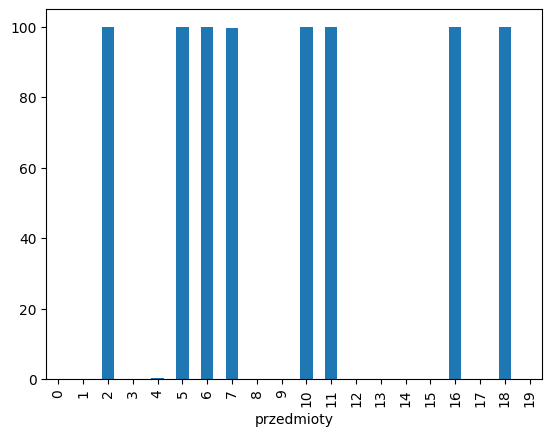

In [29]:
wyniki["wybieralnosc"].plot.bar()